In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt

In [14]:
# xem các bản có trong database

conn = sqlite3.connect('database.sqlite')

tables = pd.read_sql("""SELECT *
                        FROM sqlite_master
                        WHERE type='table'""", conn)
tables

type               name           tbl_name  rootpage  \
0  table    sqlite_sequence    sqlite_sequence         4   
1  table  Player_Attributes  Player_Attributes        11   
2  table             Player             Player        14   
3  table              Match              Match        18   
4  table             League             League        24   
5  table            Country            Country        26   
6  table               Team               Team        29   
7  table    Team_Attributes    Team_Attributes         2   

                                                 sql  
0             CREATE TABLE sqlite_sequence(name,seq)  
1  CREATE TABLE "Player_Attributes" (\n\t`id`\tIN...  
2  CREATE TABLE `Player` (\n\t`id`\tINTEGER PRIMA...  
3  CREATE TABLE `Match` (\n\t`id`\tINTEGER PRIMAR...  
4  CREATE TABLE `League` (\n\t`id`\tINTEGER PRIMA...  
5  CREATE TABLE `Country` (\n\t`id`\tINTEGER PRIM...  
6  CREATE TABLE "Team" (\n\t`id`\tINTEGER PRIMARY...  
7  CREATE TABLE `Team_Attributes` (\n\t`id`\tINTE...

In [30]:
countries = pd.read_sql("""SELECT * FROM Country""", conn)
Player = pd.read_sql("""SELECT * FROM Player""", conn)
Match = pd.read_sql("""SELECT * FROM Match""", conn)
League = pd.read_sql("""SELECT * FROM League""", conn)
Team = pd.read_sql("""SELECT * FROM Team""", conn)
Player_Attributes = pd.read_sql("""SELECT * FROM Player_Attributes""", conn)
Team_Attributes = pd.read_sql("""SELECT * FROM Team_Attributes""", conn)

In [39]:
print(countries.columns)
print(Player.columns)

Index(['id', 'name'], dtype='object')
Index(['id', 'player_api_id', 'player_name', 'player_fifa_api_id', 'birthday',
       'height', 'weight'],
      dtype='object')


# Check dữ liệu ở các bảng

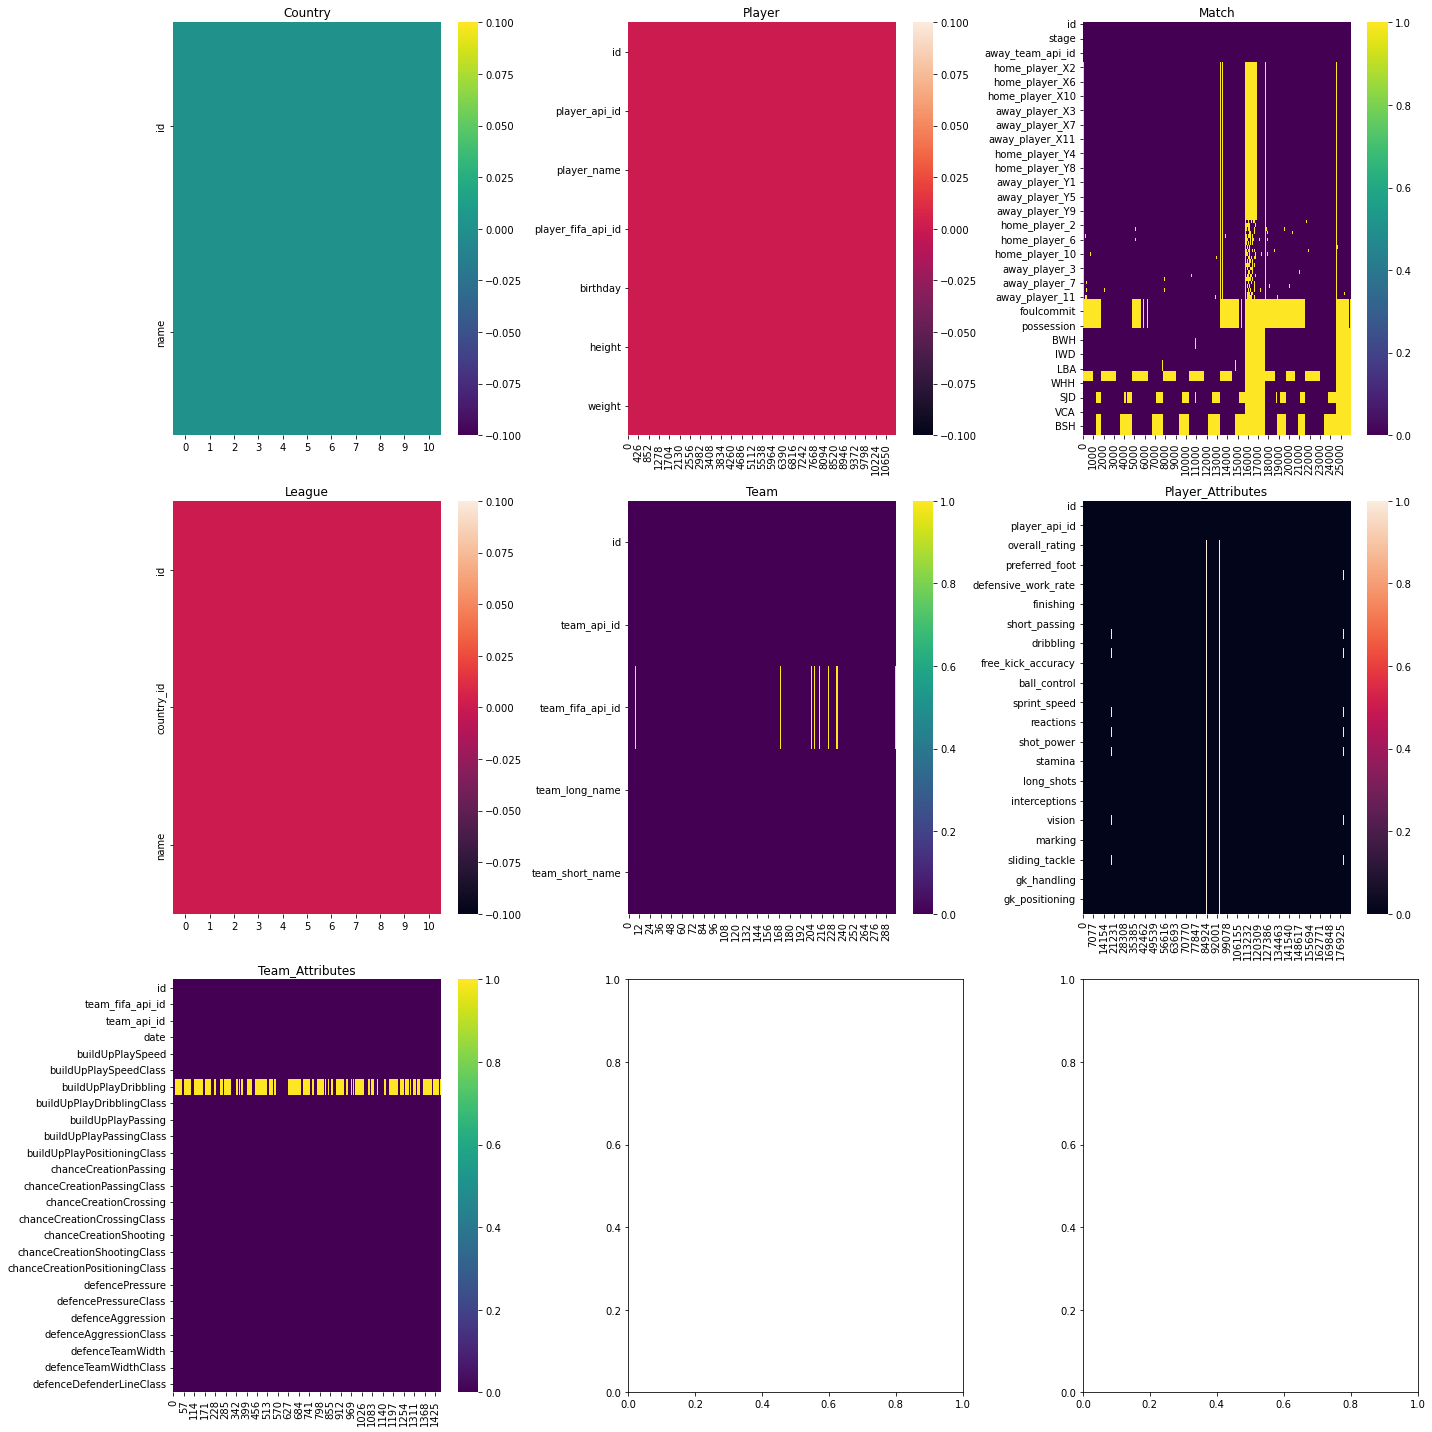

In [47]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6), (ax7, ax8, ax9)) = plt.subplots(3,3, figsize=(20,20))

sns.heatmap(countries.isna().transpose(), ax=ax1, cmap='viridis')
sns.heatmap(Player.isna().transpose(),ax=ax2, cmap='rocket')
sns.heatmap(Match.isna().transpose(), ax=ax3, cmap='viridis')
sns.heatmap(League.isna().transpose(),ax=ax4, cmap='rocket')
sns.heatmap(Team.isna().transpose(), ax=ax5, cmap='viridis')
sns.heatmap(Player_Attributes.isna().transpose(),ax=ax6, cmap='rocket')
sns.heatmap(Team_Attributes.isna().transpose(), ax=ax7, cmap='viridis')

ax1.set_title('Country')
ax2.set_title('Player')
ax3.set_title('Match')
ax4.set_title('League')
ax5.set_title('Team')
ax6.set_title('Player_Attributes')
ax7.set_title('Team_Attributes')

fig.tight_layout() # cân bằng kích thước của các axes để không bị chồng lên nhau
plt.show()